In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Loading</h1>

In [478]:
train_link="https://www.drive.google.com/uc?export=download&id=1-e3oa8IAgmjkikjirxHObjDXpiY0g51i"
test_link="https://www.drive.google.com/uc?export=download&id=1GMoK_4HOLIjCLuIdRD6pmLhSy1ymykQP"
train_set=pd.read_csv(train_link)
test_set=pd.read_csv(test_link)
train_set.head()

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [479]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   Area               2000 non-null   int64  
 2   Perimeter          2000 non-null   float64
 3   Major_Axis_Length  2000 non-null   float64
 4   Minor_Axis_Length  2000 non-null   float64
 5   Convex_Area        2000 non-null   int64  
 6   Equiv_Diameter     2000 non-null   float64
 7   Eccentricity       2000 non-null   float64
 8   Solidity           2000 non-null   float64
 9   Extent             2000 non-null   float64
 10  Roundness          2000 non-null   float64
 11  Aspect_Ration      2000 non-null   float64
 12  Compactness        2000 non-null   float64
 13  Class              2000 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 218.9+ KB


In [480]:
train_set.describe()

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,80641.46250,1130.261905,456.638748,225.707590,81495.589000,319.289997,0.861151,0.989427,0.694210,0.791254,2.042135,0.703924
std,577.494589,13719.38273,109.331843,56.331163,23.163673,13816.400567,27.021520,0.044511,0.003637,0.060180,0.055348,0.313953,0.052548
min,0.000000,47939.00000,868.485000,320.844600,154.002000,48366.000000,247.058400,0.492100,0.918600,0.484300,0.554600,1.148700,0.567000
25%,499.750000,70707.50000,1047.915750,414.419850,211.252825,71512.000000,300.046000,0.831675,0.988200,0.660025,0.752100,1.800775,0.663275
50%,999.500000,78854.50000,1123.413000,449.612650,224.834100,79692.500000,316.860650,0.863400,0.990300,0.714250,0.797450,1.982250,0.707900
75%,1499.250000,89965.75000,1204.971750,492.554275,240.424150,90920.250000,338.449300,0.897100,0.991500,0.740400,0.833875,2.263100,0.743500
max,1999.000000,136574.00000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.946400,0.994400,0.829600,0.923300,3.096900,0.904900


<h1>Data Processing</h1>

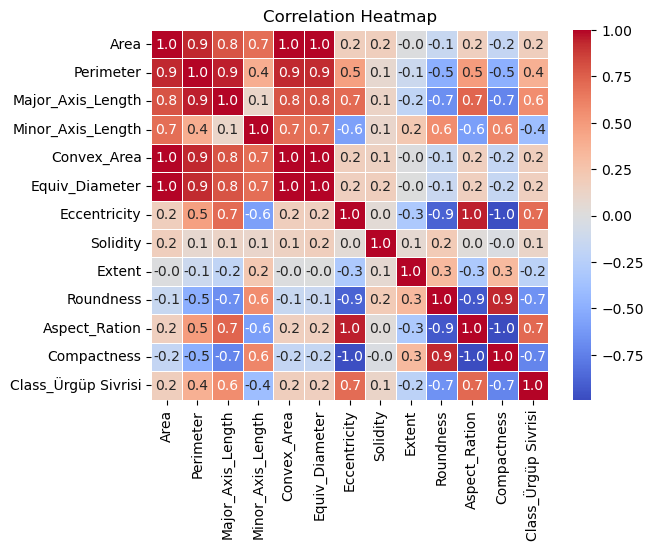

Mean
Area                 80641.462500
Perimeter             1130.261905
Major_Axis_Length      456.638748
Minor_Axis_Length      225.707590
Convex_Area          81495.589000
Equiv_Diameter         319.289997
Eccentricity             0.861151
Solidity                 0.989427
Extent                   0.694210
Roundness                0.791254
Aspect_Ration            2.042135
Compactness              0.703924
dtype: float64
Std dev
Area                 13715.952455
Perimeter              109.304507
Major_Axis_Length       56.317078
Minor_Axis_Length       23.157882
Convex_Area          13812.946035
Equiv_Diameter          27.014764
Eccentricity             0.044500
Solidity                 0.003636
Extent                   0.060165
Roundness                0.055334
Aspect_Ration            0.313875
Compactness              0.052535
dtype: float64


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class_Ürgüp Sivrisi
0,0.312668,0.678710,0.925999,-0.547589,0.301848,0.353536,1.055022,0.542512,-2.426820,-1.003981,1.103195,-1.096861,True
1,1.655119,1.326561,1.151172,1.173964,1.640520,1.608384,0.299967,0.762520,0.855814,0.130943,0.063289,-0.158440,True
2,1.291091,1.274212,1.235786,0.551113,1.280568,1.279997,0.679741,0.597514,-1.700485,-0.441941,0.524301,-0.598146,True
3,-0.811060,-0.647036,-0.475842,-0.815385,-0.796542,-0.806252,0.347158,-0.887540,-0.530372,-0.235920,0.115220,-0.225062,False
4,-0.045966,0.482003,0.803801,-0.904853,-0.042973,-0.004227,1.165134,-0.117512,0.717861,-1.314820,1.303593,-1.294824,True


In [482]:
data=train_set.copy()
def preprocessing(dataframe,mean=None,std=None):
    dataframe=pd.get_dummies(dataframe,columns=["Class"],drop_first=True)#True=Urgupsivrisi
    dataframe.drop("Unnamed: 0",axis=1,inplace=True)
    corr_matrix=dataframe.corr()
    sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",linewidth=0.5,fmt='.1f')
    plt.title("Correlation Heatmap")
    plt.show()
    z_dataframe,mean,std=z_score_normalisation(dataframe.drop(["Class_Ürgüp Sivrisi"],axis=1),mean,std)
    dataframe=pd.concat([z_dataframe,dataframe["Class_Ürgüp Sivrisi"]],axis=1)
    return dataframe,mean,std
def z_score_normalisation(dataframe,mean=None,std=None):
    try:
        if mean==None and std==None:
            mean=np.mean(dataframe,axis=0)
            std=np.std(dataframe,axis=0)
    except ValueError:
        print(";)")
    dataframe=(dataframe-mean)/std
    return dataframe,mean,std
data,train_mean,train_std=preprocessing(data)
print(f"Mean\n{train_mean}\nStd dev\n{train_std}")
data.head()

<h1>Model Development</h1>

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 2000 non-null   float64
 1   Perimeter            2000 non-null   float64
 2   Major_Axis_Length    2000 non-null   float64
 3   Minor_Axis_Length    2000 non-null   float64
 4   Convex_Area          2000 non-null   float64
 5   Equiv_Diameter       2000 non-null   float64
 6   Eccentricity         2000 non-null   float64
 7   Solidity             2000 non-null   float64
 8   Extent               2000 non-null   float64
 9   Roundness            2000 non-null   float64
 10  Aspect_Ration        2000 non-null   float64
 11  Compactness          2000 non-null   float64
 12  Class_Ürgüp Sivrisi  2000 non-null   bool   
dtypes: bool(1), float64(12)
memory usage: 189.6 KB


In [485]:
X_train=data.drop("Class_Ürgüp Sivrisi",axis=1)
X_train["Intercept_coefficient"]=1
X_train=X_train.to_numpy()
Y_train=data["Class_Ürgüp Sivrisi"]
Y_train=Y_train.to_numpy().reshape(2000,-1)#Otherwise numpy converts 1-D to 2-D by not making it mx1, but mxm by copying the rows below
theta=np.random.randn(13,1)
print(X_train[:5])
print(Y_train[:5])
print(theta[:])

[[ 0.31266786  0.6787103   0.92599888 -0.5475885   0.30184806  0.35353644
   1.05502171  0.54251211 -2.42682027 -1.00398098  1.10319471 -1.09686068
   1.        ]
 [ 1.65511929  1.32656099  1.15117214  1.17396361  1.64051977  1.60838361
   0.29996688  0.76252006  0.85581445  0.13094273  0.06328867 -0.15843988
   1.        ]
 [ 1.29109062  1.27421182  1.23578591  0.55111303  1.28056759  1.27999651
   0.67974148  0.59751409 -1.7004854  -0.44194073  0.52430094 -0.59814618
   1.        ]
 [-0.81106015 -0.64703559 -0.4758423  -0.81538502 -0.79654181 -0.8062516
   0.34715781 -0.88753958 -0.53037155 -0.23591955  0.11522025 -0.22506205
   1.        ]
 [-0.04596564  0.48200295  0.80380149 -0.90485348 -0.04297338 -0.00422719
   1.16513388 -0.11751175  0.71786069 -1.31481995  1.30359327 -1.29482368
   1.        ]]
[[ True]
 [ True]
 [ True]
 [False]
 [ True]]
[[ 1.26607868]
 [ 1.46988263]
 [-0.72391618]
 [ 0.95956275]
 [ 0.52734426]
 [-1.66184227]
 [ 1.92232558]
 [ 2.29611302]
 [-0.56798513]
 [ 1

In [486]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))
print(Sigmoid(0))

0.5


In [487]:
def predict(X,theta):
    z=np.dot(X,theta)
    for i in range(len(z)):
        z[i]=Sigmoid(z[i])
    return z
predict(X_train,theta)

array([[1.98061223e-01],
       [7.88648518e-01],
       [7.17342628e-01],
       ...,
       [9.20208636e-02],
       [9.38196947e-02],
       [4.84729807e-07]])

In [488]:
def AverageLogLikelihood(X,Y,theta):
    pre=predict(X,theta)
    m,n=X.shape
    likelihood=0
    return np.mean(Y*np.log(pre) + (1-Y)*np.log(1-pre))
AverageLogLikelihood(X_train,Y_train,theta)

-1.9328273519874182

In [489]:
epochs=1000
alpha=0.01
Average_Log_Likelihood=dict()
for i in range(epochs):
    for j in range(i,(i*5+5)%2000):
        theta=theta+alpha*((Y_train[j]-predict(X_train[j],theta))*X_train[j]).reshape(13,-1)#Otherwise numpy converts 1-D to 2-D by not making it mx1, but mxm by copying the rows below
    alpha=alpha*0.95
    Average_Log_Likelihood[(i+1)*5]=AverageLogLikelihood(X_train,Y_train,theta)
    print(f"Average Log likelihood: {Average_Log_Likelihood[(i+1)*5]} Number of iterations {(i+1)*5}")

Average Log likelihood: -1.8812342338494537 Number of iterations 5
Average Log likelihood: -1.8338490363982667 Number of iterations 10
Average Log likelihood: -1.7407108561697169 Number of iterations 15
Average Log likelihood: -1.59923903360883 Number of iterations 20
Average Log likelihood: -1.4548588844873311 Number of iterations 25
Average Log likelihood: -1.3202916265404328 Number of iterations 30
Average Log likelihood: -1.1939562981801433 Number of iterations 35
Average Log likelihood: -1.0911326193114173 Number of iterations 40
Average Log likelihood: -1.009202058769623 Number of iterations 45
Average Log likelihood: -0.9353666706451357 Number of iterations 50
Average Log likelihood: -0.8704453953179447 Number of iterations 55
Average Log likelihood: -0.8168545550682047 Number of iterations 60
Average Log likelihood: -0.7694613511865066 Number of iterations 65
Average Log likelihood: -0.7244675532850738 Number of iterations 70
Average Log likelihood: -0.6844924913051214 Number o

In [490]:
def predict_boolean(X,theta):
    z = Sigmoid(X @ theta)#@ is the fancy symbol for matrix multiplication
    z[z>0.5] = 1.0
    z[z<=0.5] = 0.0
    return z
accuracy=np.mean(predict_boolean(X_train,theta)==Y_train)
accuracy

0.866

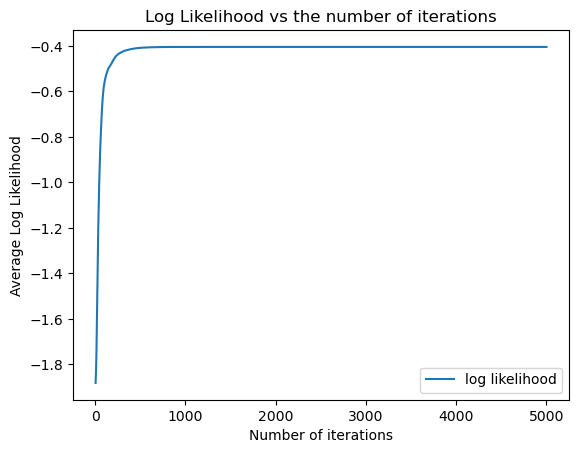

In [491]:
plt.plot(Average_Log_Likelihood.keys(),Average_Log_Likelihood.values(),label='log likelihood')
plt.xlabel("Number of iterations")
plt.ylabel("Average Log Likelihood")
plt.title("Log Likelihood vs the number of iterations")
plt.legend()
plt.show()

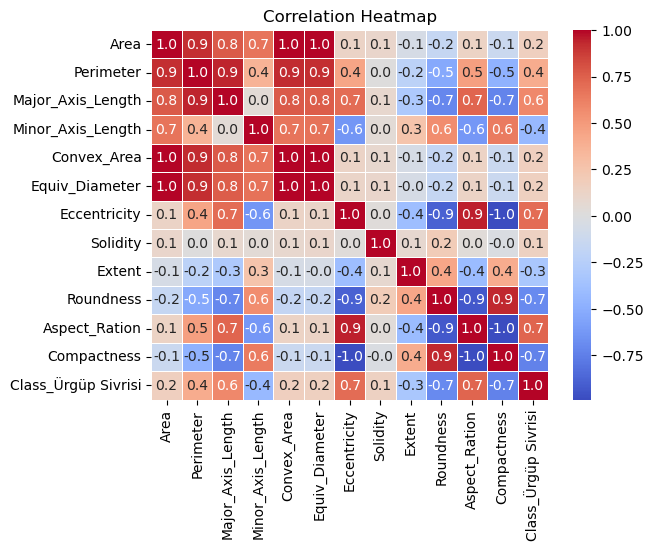

;)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class_Ürgüp Sivrisi
0,-1.285398,-1.547044,-1.510729,-0.393542,-1.302010,-1.334248,-1.093289,0.735019,0.596528,1.189964,-1.040656,1.111188,False
1,-0.344450,-0.556710,-0.645386,0.212161,-0.353479,-0.310467,-0.565200,0.405007,0.315634,0.776114,-0.700074,0.680999,False
2,-0.339274,-0.350524,-0.160435,-0.362835,-0.356882,-0.305089,0.293225,0.845023,0.227543,0.172508,0.056279,-0.171764,True
3,0.388346,0.352054,0.399912,0.152216,0.399076,0.427700,0.380866,-0.392522,0.918974,-0.006405,0.153452,-0.255518,False
4,0.345914,0.072560,-0.326170,0.999129,0.346516,0.386174,-0.852840,0.047494,0.250812,0.669489,-0.895056,0.920839,False


In [492]:
test_data,mn,st=preprocessing(test_set,train_mean,train_std)
test_data.head()

In [493]:
X_test=test_data.drop("Class_Ürgüp Sivrisi",axis=1)
X_test["Intercept_coefficient"]=1
X_test=X_test.to_numpy()
Y_test=test_data["Class_Ürgüp Sivrisi"]
Y_test=Y_test.to_numpy().reshape(500,-1)#Otherwise numpy converts 1-D to 2-D by not making it mx1, but mxm by copying the rows below
print(X_test[:5])
print(Y_test[:5])
print(theta[:])

[[-1.28539834 -1.54704422 -1.51072909 -0.3935416  -1.30200965 -1.33424807
  -1.09328906  0.73501906  0.59652786  1.18996389 -1.04065571  1.11118825
   1.        ]
 [-0.3444502  -0.55670994 -0.6453859   0.21216147 -0.35347919 -0.31046714
  -0.56520011  0.40500714  0.31563405  0.77611432 -0.70007373  0.68099941
   1.        ]
 [-0.33927374 -0.35052448 -0.16043532 -0.36283499 -0.3568818  -0.3050886
   0.29322532  0.84502304  0.2275431   0.1725084   0.0562795  -0.17176432
   1.        ]
 [ 0.38834616  0.35205405  0.39991158  0.15221644  0.39907569  0.42769959
   0.38086561 -0.39252169  0.91897401 -0.00640473  0.15345209 -0.2555179
   1.        ]
 [ 0.34591382  0.07255963 -0.32617012  0.99912897  0.3465163   0.38617415
  -0.85284005  0.04749422  0.25081241  0.66948932 -0.89505612  0.9208392
   1.        ]]
[[False]
 [False]
 [ True]
 [False]
 [False]]
[[ 0.89721864]
 [ 1.54802693]
 [-0.34665646]
 [-0.13472874]
 [ 0.17051574]
 [-2.04030771]
 [ 3.09242662]
 [ 1.70147432]
 [-0.29051805]
 [ 0.0

In [494]:
accuracy=np.mean(predict_boolean(X_test,theta)==Y_test)
accuracy

0.894

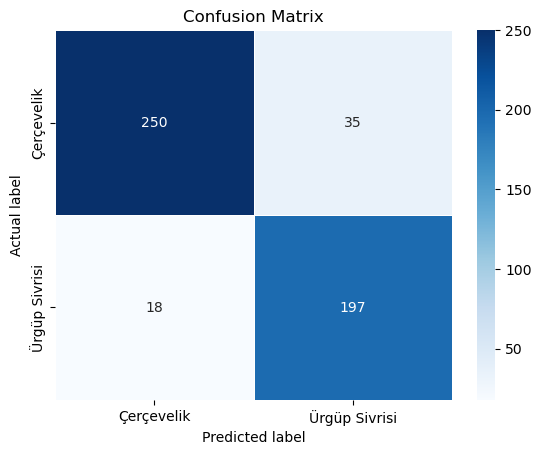

In [495]:
def confusion_matrix(Y_pred,Y_actual):
    TP=TN=FP=FN=0
    for i in range(len(Y_pred)):
        if Y_pred[i]==Y_actual[i]:
            if Y_actual[i]==1:
                TP+=1
            else:
                TN+=1
        else:
            if Y_actual[i]==1:
                FP+=1
            else:
                FN+=1
    return np.array(((TN,FP),(FN,TP)))
confusion_matrix_test=confusion_matrix(predict_boolean(X_test,theta),Y_test)
sns.heatmap(confusion_matrix_test,annot=True,cmap="Blues",linewidth=0.5,fmt='d',xticklabels=['Çerçevelik','Ürgüp Sivrisi'],yticklabels=['Çerçevelik','Ürgüp Sivrisi'])
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()